In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [4]:
wue_IS = pd.read_hdf("wue_IS_merged.h5","wue_IS")
wue_D = pd.read_hdf("wue_D_merged.h5","wue_D")
wue_F = pd.read_hdf("wue_F_merged.h5","wue_F")
alb_IS = pd.read_hdf("alb_IS_merged.h5","alb_IS")
alb_D = pd.read_hdf("alb_D_merged.h5","alb_D")
alb_F = pd.read_hdf("alb_F_merged.h5","alb_F")

In [5]:

wue_IS100 = wue_IS[wue_IS["Customers_N"] == 100]
wue_D100 = wue_D[wue_D["Customers_N"] == 100]
wue_F100 = wue_F[wue_F["Customers_N"] == 100]
alb_IS100 = alb_IS[alb_IS["Customers_N"] == 100]
alb_D100 = alb_D[alb_D["Customers_N"] == 100]
alb_F100 = alb_F[alb_F["Customers_N"] == 100]

In [6]:
alb_IS100["Stops_h"].mean()

10.08

In [7]:
alb_IS100["Trans_per_order"].mean()

2.011

In [8]:
alb_IS100["Distance"].mean()

131673.4

In [9]:
alb_IS100["Time"].mean()

36791.5

In [10]:
(alb_IS100["Distance"]/alb_IS100["Time"]).mean()

3.5755795469587257

In [11]:
(wue_IS100["Distance"]/wue_IS100["Time"]).mean()

3.79269287748068

In [12]:
alb_IS100.mean()

Customers_N                100.000
Distance                131673.400
Time                     36791.500
Stops                      103.000
Stops_h                     10.080
FixedDC_Cost               480.000
Trans_Cost                 200.853
Variable_DC               1205.113
Fixed_V                     67.500
Total_Cost                1953.466
Var_per_order               12.051
Trans_per_order              2.011
Transp_order_with_V          2.683
FixedDC_per_order            4.800
Total_Cost_per_order        19.533
Items                     4530.500
Cost_per_item                0.431
dtype: float64

In [15]:
import math

In [16]:
def margin_fun_time_alb_IS(x):
    time = x
    stops = 103
    Dist_pred = time * 3.5755795469587257
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5
    #marketing = (2/basket_size)*100
    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (4.8 + 12.051 + transp_c + 0.675)
    else:
        cost_order_abs = (4.8 + 12.051 + transp_c + vehicle_fix)
    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS  - cost_order + Delivery_inc)
    
    return(basket_prof)

In [17]:
margin_fun_time_alb_IS(36791.500)

0.5821219902206529

In [21]:
cost_order

NameError: name 'cost_order' is not defined

In [ ]:
#Distances for 2-12 stops/h
2 = 185000
3 = 123500
4 = 92600
5 = 74200
6 = 61800
7 = 53000
8 = 46350
9 = 41180
10 = 37080
11 = 33700
12 = 30900

In [18]:
distances = [185000, 123500, 92600, 74200, 61800, 53000, 46350, 41180, 37080, 33700,30900]

In [19]:
stops_hour = list(range(2,13,1))
stops_hour

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [24]:
alb_is_list = list(map(margin_fun_time_alb_IS, distances))
alb_is_list

[-10.936772486421567,
 -5.896720416611156,
 -3.5070844986088474,
 -1.9703555053647612,
 -1.1242718360046098,
 -0.5238253609748291,
 -0.0700788770034606,
 0.2826834270765417,
 0.5624368983972339,
 0.7930629308518533,
 0.9841140819976957]

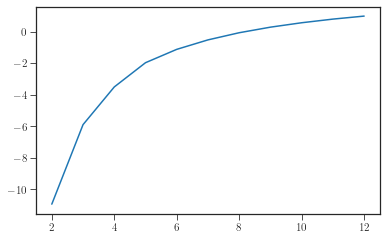

In [25]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))
ax1.plot(stops_hour, alb_is_list)
plt.show()

In [34]:
alb_D100.mean()

Customers_N                100.000000
Distance                150439.582000
Time                     37959.296000
Stops                      102.999989
Stops_h                      9.780000
FixedDC_Cost               480.000000
Trans_Cost                 209.853000
Variable_DC                662.270000
Fixed_V                     67.499991
Total_Cost                1419.623000
Var_per_order                6.622000
Trans_per_order              2.099000
Transp_order_with_V          2.773000
FixedDC_per_order            4.800000
Total_Cost_per_order        14.196000
Items                     4536.100000
Cost_per_item                0.314000
dtype: float64

In [35]:
(alb_D100["Distance"]/alb_D100["Time"]).mean()

3.9621765718721695

In [26]:
def margin_fun_time_alb_D(x):
    time = x
    stops = 103
    Dist_pred = time * 3.9621765718721695
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5
    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (4.8 + 6.622000 + transp_c + 0.675)
    else:
        cost_order_abs = (4.8 + 6.622000 + transp_c + vehicle_fix)
    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS - cost_order + Delivery_inc)
    
    return(basket_prof)

In [27]:
alb_D_list = list(map(margin_fun_time_alb_D, distances))
alb_D_list

[-4.31144349804179,
 0.7821039350910226,
 3.1986180112504385,
 4.75135212132594,
 5.608221847681172,
 6.2163229438042436,
 6.67585388576088,
 7.033113279733183,
 7.316433108608706,
 7.54999921143779,
 7.743485923840584]

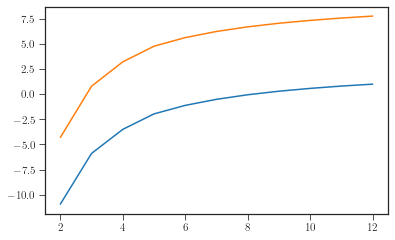

In [28]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))
ax1.plot(stops_hour, alb_is_list)
ax1.plot(stops_hour, alb_D_list)
plt.show()

In [40]:
alb_F100.mean()

Customers_N                100.000000
Distance                165174.786000
Time                     39006.297000
Stops                      103.599993
Stops_h                      9.550000
FixedDC_Cost               560.000000
Trans_Cost                 217.546000
Variable_DC                390.104000
Fixed_V                     80.999992
Total_Cost                1248.650000
Var_per_order                3.901000
Trans_per_order              2.176000
Transp_order_with_V          2.987000
FixedDC_per_order            5.600000
Total_Cost_per_order        12.487000
Items                     4536.100000
Cost_per_item                0.275000
dtype: float64

In [41]:
(alb_F100["Distance"]/alb_F100["Time"]).mean()

4.227186230941266

In [29]:
def margin_fun_time_alb_F(x):
    time = x
    stops = 103
    Dist_pred = time * 4.227186230941266
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5
    #marketing = (2/basket_size)*100
    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (5.6 + 3.901000 + transp_c + 0.675)
    else:
        cost_order_abs = (5.6 + 3.901000 + transp_c + vehicle_fix)
    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS - cost_order + Delivery_inc)
    
    return(basket_prof)

In [30]:
alb_F_list = list(map(margin_fun_time_alb_F, distances))
alb_F_list

[-2.0205037686293004,
 3.1097143760771964,
 5.544653248783387,
 7.108358758744355,
 7.97262225458762,
 8.585970541960254,
 9.049466690940713,
 9.409808809772136,
 9.695573352752568,
 9.931154854038876,
 10.126311127293807]

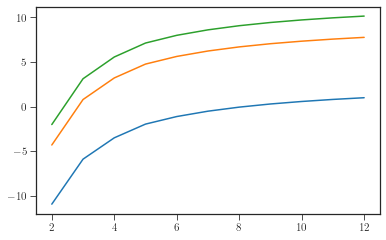

In [31]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))
ax1.plot(stops_hour, alb_is_list)
ax1.plot(stops_hour, alb_D_list)
ax1.plot(stops_hour, alb_F_list)
plt.show()

In [46]:
wue_IS100.mean()

Customers_N                100.000
Distance                154559.200
Time                     40737.800
Stops                      103.000
Stops_h                      9.100
FixedDC_Cost               480.000
Trans_Cost                 223.973
Variable_DC               1208.517
Fixed_V                     67.500
Total_Cost                1979.990
Var_per_order               12.085
Trans_per_order              2.240
Transp_order_with_V          2.915
FixedDC_per_order            4.800
Total_Cost_per_order        19.799
Items                     4543.300
Cost_per_item                0.437
dtype: float64

In [47]:
(wue_IS100["Distance"]/wue_IS100["Time"]).mean()

3.79269287748068

In [32]:
def margin_fun_time_wue_IS(x):
    time = x
    stops = 103
    Dist_pred = time *3.79269287748068
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5
    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (4.8 + 12.085 + transp_c + 0.675)
    else:
        cost_order_abs = (4.8 + 12.085 + transp_c + vehicle_fix)


    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS - cost_order + Delivery_inc)
    
    return(basket_prof)

In [33]:
wue_IS_list = list(map(margin_fun_time_wue_IS, distances))
wue_IS_list

[-11.069645910251339,
 -5.999550783329948,
 -3.5948200610231034,
 -2.0491025758954002,
 -1.1969614446136916,
 -0.5922161256395704,
 -0.1352210834602694,
 0.22006679143702357,
 0.5018231332317846,
 0.7341003125650296,
 0.9265192776931528]

In [34]:
def margin_fun_time_wue_IS(x):
    time = x
    stops = 103
    Dist_pred = time *3.79269287748068
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5

    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (4.8 + 12.085 + transp_c + 0.675)
    else:
        cost_order_abs = (4.8 + 12.085 + transp_c + vehicle_fix)
    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS - cost_order + Delivery_inc)
    
    return(basket_prof)

In [98]:
import math
def v_fix(x):
    time = x
    vehicles_req = math.ceil(time / 25200)
    if vehicles_req <= 3:
        vehicle_fix = 67.5
    else:
        vehicle_fix = vehicles_req * 22.5
    return(vehicle_fix)

In [92]:
distances

[185000, 123500, 92600, 74200, 61800, 53000, 46350, 41180, 37080, 33700, 30900]

In [100]:
v_fix(185000)

67.5

In [101]:
math.ceil(185000 / 25200)

8

In [35]:
wue_IS_list = list(map(margin_fun_time_wue_IS, distances))
wue_IS_list

[-11.069645910251339,
 -5.999550783329948,
 -3.5948200610231034,
 -2.0491025758954002,
 -1.1969614446136916,
 -0.5922161256395704,
 -0.1352210834602694,
 0.22006679143702357,
 0.5018231332317846,
 0.7341003125650296,
 0.9265192776931528]

In [51]:
wue_D100.mean()

Customers_N                100.000
Distance                213952.400
Time                     44029.600
Stops                      103.300
Stops_h                      8.460
FixedDC_Cost               480.000
Trans_Cost                 250.512
Variable_DC                662.270
Fixed_V                     74.250
Total_Cost                1467.032
Var_per_order                6.622
Trans_per_order              2.506
Transp_order_with_V          3.248
FixedDC_per_order            4.800
Total_Cost_per_order        14.670
Items                     4536.100
Cost_per_item                0.325
dtype: float64

In [52]:
(wue_D100["Distance"]/wue_D100["Time"]).mean()

4.852404863899981

In [36]:
def margin_fun_time_wue_D(x):
    time = x
    stops = 103
    Dist_pred = time *4.852404863899981
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5

    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (4.8 + 6.622+ transp_c + 0.675)
    else:
        cost_order_abs = (4.8 +6.622 + transp_c + vehicle_fix)
    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS - cost_order + Delivery_inc)
    
    return(basket_prof)

In [37]:
wue_D_list = list(map(margin_fun_time_wue_D, distances))
wue_D_list

[-4.682001024598371,
 0.534731748443793,
 3.0131389466064427,
 4.6027285079718965,
 5.484435603674704,
 6.110163219979924,
 6.583014202756029,
 6.9506291773353475,
 7.242161362204822,
 7.48249765119478,
 7.6815928018373505]

In [55]:
wue_F100.mean()

Customers_N                100.000
Distance                215431.400
Time                     43515.200
Stops                      103.400
Stops_h                      8.560
FixedDC_Cost               560.000
Trans_Cost                 248.303
Variable_DC                390.104
Fixed_V                     76.500
Total_Cost                1274.907
Var_per_order                3.901
Trans_per_order              2.483
Transp_order_with_V          3.249
FixedDC_per_order            5.600
Total_Cost_per_order        12.750
Items                     4536.100
Cost_per_item                0.282
dtype: float64

In [56]:
(wue_F100["Distance"]/wue_F100["Time"]).mean()

4.949726246110201

In [38]:
def margin_fun_time_wue_F(x):
    time = x
    stops = 103
    Dist_pred = time *4.949726246110201
    Cost_T = time * 0.004815
    Cost_D = Dist_pred * 0.00018
    Total_C = Cost_T + Cost_D
    Cost_order_tran = Total_C/100
    Stops_min = (time/60)/stops
    Stops_h = 60/Stops_min
    
    basket_size = 100
    COGS= 80
    Delivery_inc = 5

    transp_c = Cost_order_tran
    vehicle_req = math.ceil(time/25200)
    vehicle_fix = (vehicle_req*22.5)/100
    if vehicle_fix <= 0.675:
        cost_order_abs = (5.6 + 3.901+ transp_c + 0.675)
    else:
        cost_order_abs = (5.6 +3.901 + transp_c + vehicle_fix)
    cost_order = (cost_order_abs/80)*100
    basket_prof = (basket_size - COGS - cost_order + Delivery_inc)
    
    return(basket_prof)

In [39]:
wue_F_list = list(map(margin_fun_time_wue_F, distances))
wue_F_list

[-2.3212610499433737,
 2.908938569362128,
 5.394112036622939,
 6.987730703211902,
 7.872153065478376,
 8.499807645151357,
 8.974114799108783,
 9.342861864666657,
 9.635291839287024,
 9.876368257388696,
 10.07607653273919]

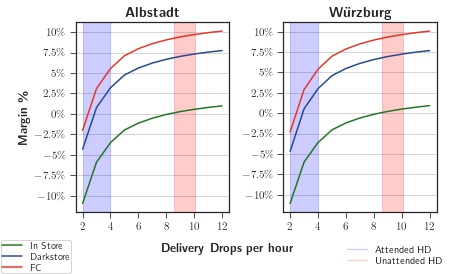

In [46]:
from matplotlib.lines import Line2D
custom_line = [Line2D([0], [0], color="blue", alpha =0.2, lw=1.3, ls = "-"),
              Line2D([0], [0], color="red", alpha =0.2, lw=1.3, ls = "-")]
plt.style.use("seaborn-ticks")


fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))


ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)
ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Delivery Drops per hour}", y = 0.05, fontsize=12)


ax1.plot(stops_hour, alb_is_list, label="In Store", color="#207720")
ax1.plot(stops_hour, alb_D_list, label = "Darkstore", color="#234990")
ax1.plot(stops_hour, alb_F_list, label= "FC", color = "#E23726")

ax2.plot(stops_hour, wue_IS_list, label="In Store", color="#207720")
ax2.plot(stops_hour, wue_D_list, label = "Darkstore", color="#234990")
ax2.plot(stops_hour, wue_F_list, label= "FC", color = "#E23726")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

loc =plticker.MultipleLocator(base=2)

ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)


ax1.axvspan(2, 4, alpha=0.2, color='blue')
ax1.axvspan(8.560, 10.08, alpha=0.2, color='red')

ax2.axvspan(2, 4, alpha=0.2, color='blue')
ax2.axvspan(8.560, 10.08, alpha=0.2, color='red')

ax1.set_yticks([-10, -7.5,- 5.0, -2.5, 0, 2.5, 5, 7.5, 10],["$-10\%$", "$-7.5\%$", "$-5\%$", 
                    "$-2.5\%$", "$0\%$", "$2.5\%$","$5\%$","$7.5\%$","$10\%$" ], rotation=0)
ax2.set_yticks([-10, -7.5,- 5.0, -2.5, 0, 2.5, 5, 7.5, 10],["$-10\%$", "$-7.5\%$", "$-5\%$", 
                    "$-2.5\%$", "$0\%$", "$2.5\%$","$5\%$","$7.5\%$","$10\%$" ], rotation=0)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)

fig.legend(custom_line, ["Attended HD", "Unattended HD"], loc= "lower right", labelspacing=0.2,
         prop={"size":"small"})


fig.tight_layout()
plt.show()
fig.savefig("result_graph/margin_delivery2.svg", format="svg")

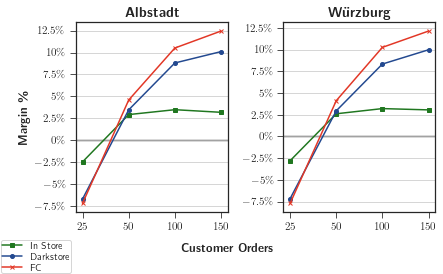

In [50]:
plt.style.use("seaborn-ticks")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))

xticks = [1,2,3,4]
labels = ["$25$","$50$", "$100$", "$150$"]

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)
ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Customer Orders}", y = 0.05, fontsize=12)


ax1.plot(xticks, alb_IS_list, label="In Store", color="#207720",marker = "s", ms=4)
ax1.plot(xticks, alb_D_list, label = "Darkstore", color="#234990" ,marker = "o", ms=4)
ax1.plot(xticks, alb_F_list, label= "FC", color = "#E23726" ,marker = "x", ms=4)

ax2.plot(xticks, wue_IS_list, label="In Store", color="#207720",marker = "s", ms=4)
ax2.plot(xticks, wue_D_list, label = "Darkstore", color="#234990",marker = "o", ms=4)
ax2.plot(xticks, wue_F_list, label= "FC", color = "#E23726",marker = "x", ms=4)


ax1.set_xticks(xticks)
ax1.set_xticklabels(labels, rotation = 0)
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels, rotation = 0)

loc =plticker.MultipleLocator(base=2.5)
ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

ax1.axhline(y=0,xmin=0,xmax=1,c="black",linewidth=1.3,zorder=0)
ax2.axhline(y=0,xmin=0,xmax=1,c="black",linewidth=1.3,zorder=0)


ax1.set_yticks([-7.5,- 5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5],["$-7.5\%$", "$-5\%$", 
                    "$-2.5\%$", "$0\%$", "$2.5\%$","$5\%$","$7.5\%$","$10\%$","$12.5\%$" ], rotation=0)
ax2.set_yticks([-7.5,- 5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5],["$-7.5\%$", "$-5\%$", 
                    "$-2.5\%$", "$0\%$", "$2.5\%$","$5\%$","$7.5\%$","$10\%$","$12.5\%$" ], rotation=0)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
fig.savefig("result_graph/basket_prof.svg", format="svg")